In [1]:
require(data.table)
require(pbapply)
pboptions(type="timer")
require(ggplot2)
require(cowplot)

Loading required package: data.table

Loading required package: pbapply

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
root_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726"

In [3]:
read_dots = function(dpath, magnification, image_type, nfields, ncores) {
    print(sprintf("%s - %s", magnification, image_type))
    d = rbindlist(pblapply(1:nfields, function(sid) {
        fpath = file.path(dpath, sprintf("%s_%s_calc", magnification, image_type), sprintf("%03d_allDots_snr2.dilated_labels_watershed.csv", sid))
        stopifnot(file.exists(fpath))
        d = fread(fpath)
        d$series_id = sid
        return(d)
    }, cl=ncores))
    d$magnification = magnification
    d$image_type = image_type
    return(d)
}

In [4]:
dots_data = rbindlist(list(
    read_dots(root_path, "20x", "dw", 7, 7),
    read_dots(root_path, "20x", "raw", 7, 7),
    read_dots(root_path, "60x", "dw", 7, 7),
    read_dots(root_path, "60x", "raw", 7, 7)
))

[1] "20x - dw"
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  
[1] "20x - raw"
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  
[1] "60x - dw"
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=06s  
[1] "60x - raw"
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  


In [5]:
dots_data[is.finite(SNR2) & is.finite(SNR), .(pcor=cor(SNR, SNR2, use="pairwise.complete.obs", method="pearson")), by=c("magnification", "image_type")]

magnification,image_type,pcor
<chr>,<chr>,<dbl>
20x,dw,0.87041687
20x,raw,0.89783658
60x,dw,0.00924694
60x,raw,0.85883167


In [6]:
p1 = ggplot(dots_data[is.finite(SNR2) & is.finite(SNR)][magnification=="60x"][image_type=="dw"],
       aes(x=SNR, y=SNR2)) + geom_point(alpha=.5, size=.5) +
    facet_wrap(~image_type~magnification, scales="free") +
    scale_x_log10() + scale_y_log10() + theme_bw()

In [7]:
p2 = ggplot(dots_data[is.finite(SNR2) & is.finite(SNR)][magnification=="60x"][image_type=="raw"],
       aes(x=SNR, y=SNR2)) + geom_point(alpha=.5, size=.5) +
    facet_wrap(~image_type~magnification, scales="free") +
    scale_x_log10() + scale_y_log10() + theme_bw()

In [8]:
p3 = ggplot(dots_data[is.finite(SNR2) & is.finite(SNR)][magnification=="20x"][image_type=="dw"],
       aes(x=SNR, y=SNR2)) + geom_point(alpha=.5, size=.5) +
    facet_wrap(~image_type~magnification, scales="free") +
    scale_x_log10() + scale_y_log10() + theme_bw()

In [9]:
p4 = ggplot(dots_data[is.finite(SNR2) & is.finite(SNR)][magnification=="20x"][image_type=="raw"],
       aes(x=SNR, y=SNR2)) + geom_point(alpha=.5, size=.5) +
    facet_wrap(~image_type~magnification, scales="free") +
    scale_x_log10() + scale_y_log10() + theme_bw()

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 9606 rows containing missing values (geom_point).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 154683 rows containing missing values (geom_point).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous 

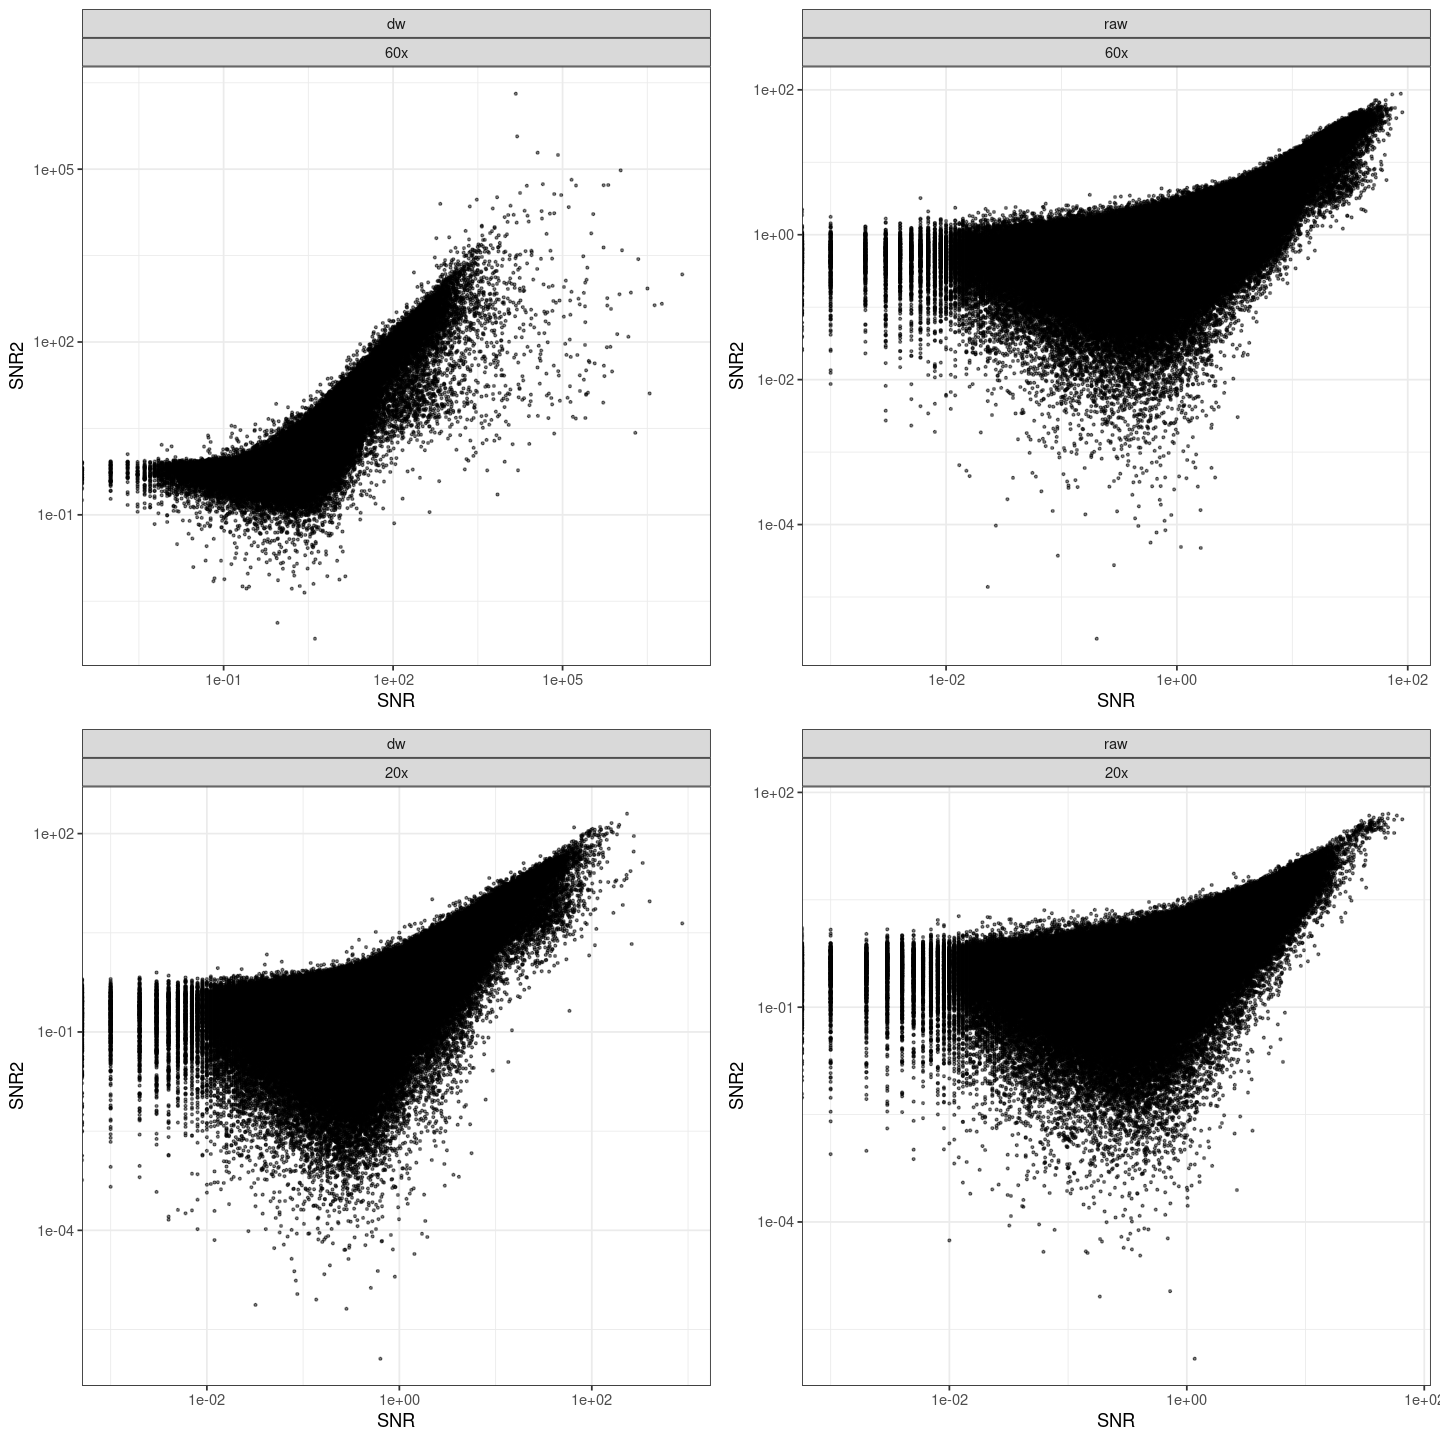

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
plot_grid(p1, p2, p3, p4, nrow=2)